# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Analysis
- There is a strong negative correlation  between a city's latitude and max temperature in the northern hempisphere, meaning that it seems the farther north you go the lower the temperature, while there seems to be a weak or moderate correlation beteen max temperature and latitude in the southern hemisphere.

- Humidity and latitude both have a positive correlation, meaning that as latitude increases so does humidity.

- There seems to be a weak correlation between cloudiness and latitude for both northern and southern hempispheres, meaning that latitude doesn't have much affect on cloudiness.

- With wind speed and latititude there is almost no correlation or at least a very weak correlation indicating that latitude has almost no effect on wind speed at all.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

    

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create empty lists to store values

cloudiness = []
country = []
date = []
humidity = []
max_temp = []
lat = []
lng = []
wind_speed = []
city_name = []
city_number= 0
city_set=0

# Create a for loop
for city in cities:
    if city_number%50==0:
        city_set+=1
        city_number=0
    city_number+=1
        

    url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&'
    query_url = url + 'appid=' + weather_api_key + '&q=' + city

    response = requests.get(query_url)
    response_json = response.json()
    print(f"Processing Record {city_number} of Set {city_set} | {city}")
    

# Try to grab the values for the empty lists

    try:     
       
        cloudiness.append(response_json['clouds']['all'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        max_temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        lat.append(response_json['coord']['lat'])  
        lng.append(response_json["coord"]["lon"])
        wind_speed.append(response_json['wind']['speed'])
        city_name.append(response_json['name'])
        
       
            
      
        
# Handle exceptions for a character that is not available
    except Exception as e:
        
        print(f"Not found: {city}",e)
        

        
   

Processing Record 1 of Set 1 | misratah
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | mankono
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | nanortalik
Processing Record 6 of Set 1 | salalah
Processing Record 7 of Set 1 | hasaki
Processing Record 8 of Set 1 | sentyabrskiy
Not found: sentyabrskiy 'clouds'
Processing Record 9 of Set 1 | saint george
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | illoqqortoormiut
Not found: illoqqortoormiut 'clouds'
Processing Record 12 of Set 1 | tra vinh
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | luena
Processing Record 16 of Set 1 | batagay-alyta
Processing Record 17 of Set 1 | marcona
Not found: marcona 'clouds'
Processing Record 18 of Set 1 | taolanaro
Not found: taolanaro 'clouds'
Processing Record 19 of Set 1 | boras
Processing Record 20 of Set 1 | zhangjiakou
Processing Record 21 of Set 1 | victoria
Pro

Processing Record 38 of Set 4 | katobu
Processing Record 39 of Set 4 | portland
Processing Record 40 of Set 4 | yabelo
Processing Record 41 of Set 4 | aloleng
Processing Record 42 of Set 4 | hamilton
Processing Record 43 of Set 4 | sitka
Processing Record 44 of Set 4 | tiassale
Processing Record 45 of Set 4 | airai
Processing Record 46 of Set 4 | ponta do sol
Processing Record 47 of Set 4 | guerrero negro
Processing Record 48 of Set 4 | bambous virieux
Processing Record 49 of Set 4 | verbivka
Processing Record 50 of Set 4 | filadelfia
Processing Record 1 of Set 5 | nuuk
Processing Record 2 of Set 5 | ust-maya
Processing Record 3 of Set 5 | kodiak
Processing Record 4 of Set 5 | vestmannaeyjar
Processing Record 5 of Set 5 | lompoc
Processing Record 6 of Set 5 | vila velha
Processing Record 7 of Set 5 | isangel
Processing Record 8 of Set 5 | cidreira
Processing Record 9 of Set 5 | zhigansk
Processing Record 10 of Set 5 | alofi
Processing Record 11 of Set 5 | kapaa
Processing Record 12 of 

Processing Record 29 of Set 8 | sakakah
Processing Record 30 of Set 8 | iquique
Processing Record 31 of Set 8 | sinnamary
Processing Record 32 of Set 8 | kuybyshevo
Processing Record 33 of Set 8 | poum
Processing Record 34 of Set 8 | champerico
Processing Record 35 of Set 8 | omsukchan
Processing Record 36 of Set 8 | anage
Processing Record 37 of Set 8 | sambava
Processing Record 38 of Set 8 | toamasina
Processing Record 39 of Set 8 | chitral
Processing Record 40 of Set 8 | olafsvik
Processing Record 41 of Set 8 | lima
Processing Record 42 of Set 8 | yanan
Not found: yanan 'clouds'
Processing Record 43 of Set 8 | galveston
Processing Record 44 of Set 8 | pevek
Processing Record 45 of Set 8 | sugod
Processing Record 46 of Set 8 | svetlogorsk
Processing Record 47 of Set 8 | dongsheng
Processing Record 48 of Set 8 | kawana waters
Not found: kawana waters 'clouds'
Processing Record 49 of Set 8 | kahului
Processing Record 50 of Set 8 | nauta
Processing Record 1 of Set 9 | america dourada
Pr

Processing Record 19 of Set 12 | santa rosa
Processing Record 20 of Set 12 | korla
Processing Record 21 of Set 12 | nome
Processing Record 22 of Set 12 | deqing
Processing Record 23 of Set 12 | san pedro
Processing Record 24 of Set 12 | adre
Processing Record 25 of Set 12 | suntar
Processing Record 26 of Set 12 | juba
Processing Record 27 of Set 12 | iskateley
Processing Record 28 of Set 12 | college station
Processing Record 29 of Set 12 | ferkessedougou
Processing Record 30 of Set 12 | tursunzoda
Processing Record 31 of Set 12 | itupiranga
Processing Record 32 of Set 12 | pasni
Processing Record 33 of Set 12 | maldonado
Processing Record 34 of Set 12 | boa vista
Processing Record 35 of Set 12 | nayoro
Processing Record 36 of Set 12 | nara
Processing Record 37 of Set 12 | bjornevatn
Processing Record 38 of Set 12 | hauterive
Processing Record 39 of Set 12 | dayong
Processing Record 40 of Set 12 | pinega
Processing Record 41 of Set 12 | laguna
Processing Record 42 of Set 12 | nemuro
Pr

In [7]:
#create a dataframe
weather_dict={'City':city_name,
        'Lat':lat,
        'Lng':lng,
        'Max Temp':max_temp,
        'Humidity':humidity,
        'Cloudiness':cloudiness,
        'Wind Speed':wind_speed,
        'Country':country,
        'Date':date}
# Drop cities that were skipped since they could did not return any response from OpenWeatherMap API.



df = pd.DataFrame(weather_dict)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Misratah,32.3754,15.0925,61.20,39,1,8.86,LY,1673903961
1,George Town,5.4112,100.3354,77.95,81,20,5.75,MY,1673903867
2,Mankono,8.0586,-6.1897,79.34,14,15,3.40,CI,1673903961
3,Mataura,-46.1927,168.8643,59.77,75,100,5.70,NZ,1673903962
4,Nanortalik,60.1432,-45.2371,8.51,60,4,18.52,GL,1673903962


In [8]:
#  Get the indices of cities that have humidity over 100%.
df['Humidity'].max()

100

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

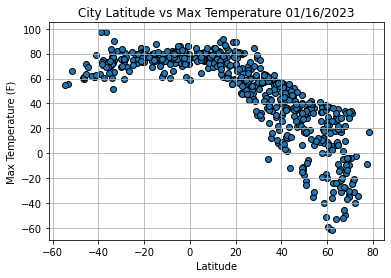

In [11]:
date = pd.Timestamp('today').strftime('%m/%d/%Y')

latitude = df['Lat']
temperature = df['Max Temp']
plt.scatter(latitude,temperature,edgecolor='black', linewidth=1, marker="o",)
plt.title(f"City Latitude vs Max Temperature {date}")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('Latitude vs Max Temperature.png')

## Latitude vs. Humidity Plot

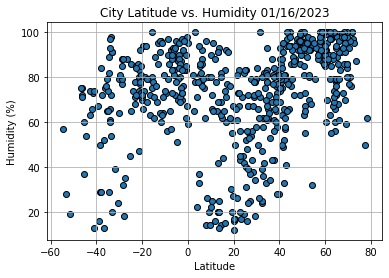

In [12]:
latitude = df['Lat']
humidity = df['Humidity']
plt.scatter(latitude,humidity,edgecolor='black', linewidth=1, marker="o")
plt.title(f"City Latitude vs. Humidity {date}")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('Latitude vs Humidity.png')

## Latitude vs. Cloudiness Plot

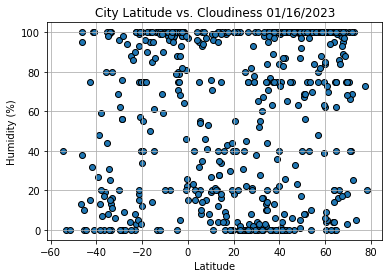

In [13]:
latitude = df["Lat"]
cloudiness = df["Cloudiness"]
plt.scatter(latitude,cloudiness,edgecolor="black", linewidth=1, marker="o")
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

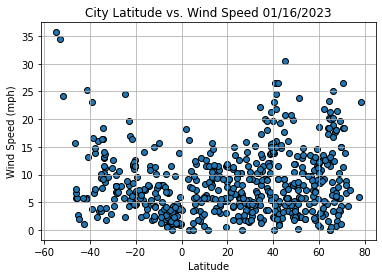

In [14]:
latitude = df['Lat']
wind = df['Wind Speed']
plt.scatter(latitude,wind,edgecolor='black', linewidth=1, marker="o")
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('Latitude vs Wind Speed (mph).png')

## Linear Regression

In [15]:
# Set up new  Northern df
north_df = df.loc[df['Lat'] >= 0]
# Set up southern df
south_df = df.loc[df['Lat'] < 0]

In [16]:

# Create linear regression
x_values = north_df.groupby('City')['Lat'].mean()
y_values = north_df.groupby('City')['Max Temp'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


In [17]:
# Create and print r-value
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue}")

# Create string of equation to put on graph
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"


The r-value is: -0.8206975630113008


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

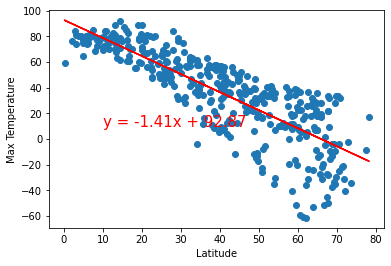

In [18]:
# Plot graph
x_axis = north_df['Lat']
y_axis = north_df['Max Temp']
plt.scatter(x_axis, y_axis)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:
# Create linear regression
x_values = south_df.groupby('City')['Lat'].mean()
y_values = south_df.groupby('City')['Max Temp'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


In [20]:
# Create and print r-value
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue}")

# Create string of equation to put on graph
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"


The r-value is: 0.4357443302817909


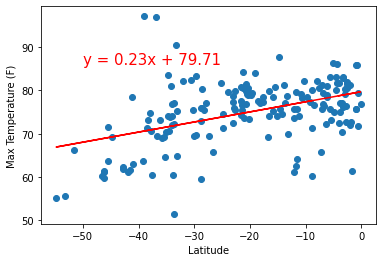

In [21]:
# Plot graph
x_axis = south_df['Lat']
y_axis = south_df['Max Temp']
plt.scatter(x_axis, y_axis)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,86),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.49423522943584575


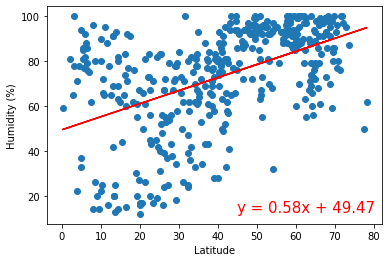

In [22]:
# Create linear regression
x_values = north_df.groupby('City')['Lat'].mean()
y_values = north_df.groupby('City')['Humidity'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create and print r-value
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue}")

# Create string of equation to put on graph
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot graph
x_axis = north_df['Lat']
y_axis = north_df['Humidity']
plt.scatter(x_axis, y_axis)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,13),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.47405683607867843


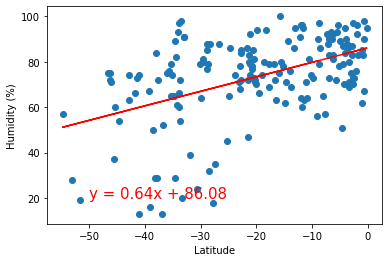

In [23]:
# Create linear regression
x_values = south_df.groupby('City')['Lat'].mean()
y_values = south_df.groupby('City')['Humidity'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create and print r-value
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue}")

# Create string of equation to put on graph
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot graph
x_axis = south_df['Lat']
y_axis = south_df['Humidity']
plt.scatter(x_axis, y_axis)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3177381921399945


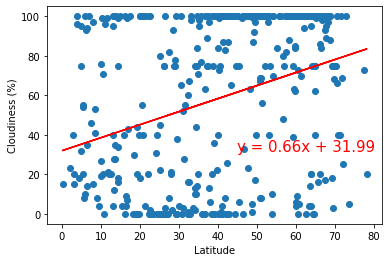

In [24]:
# Create linear regression
x_values = north_df.groupby('City')['Lat'].mean()
y_values = north_df.groupby('City')['Cloudiness'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create and print r-value
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue}")

# Create string of equation to put on graph
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot graph
x_axis = north_df['Lat']
y_axis = north_df['Cloudiness']
plt.scatter(x_axis, y_axis)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,32),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.46628567072008303


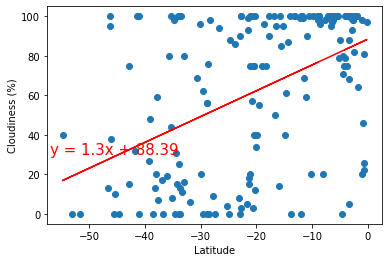

In [25]:
# Create linear regression
x_values = south_df.groupby('City')['Lat'].mean()
y_values = south_df.groupby('City')['Cloudiness'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create and print r-value
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue}")

# Create string of equation to put on graph
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot graph
x_axis = south_df['Lat']
y_axis = south_df['Cloudiness']
plt.scatter(x_axis, y_axis)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-57,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1761079847995532


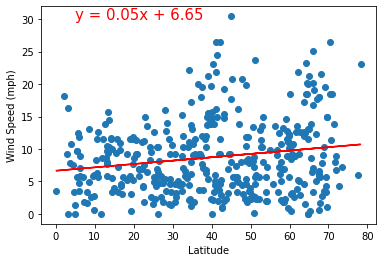

In [26]:
# Create linear regression
x_values = north_df.groupby('City')['Lat'].mean()
y_values = north_df.groupby('City')['Wind Speed'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create and print r-value
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue}")

# Create string of equation to put on graph
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot graph
x_axis = north_df['Lat']
y_axis = north_df['Wind Speed']
plt.scatter(x_axis, y_axis)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.5011792606620498


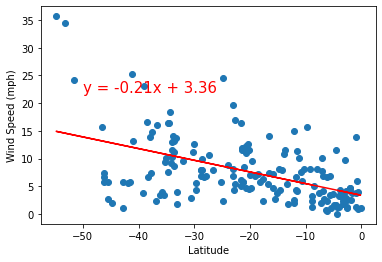

In [27]:
# Create linear regression
x_values = south_df.groupby('City')['Lat'].mean()
y_values = south_df.groupby('City')['Wind Speed'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create and print r-value
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue}")

# Create string of equation to put on graph
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot graph
x_axis = south_df['Lat']
y_axis = south_df['Wind Speed']
plt.scatter(x_axis, y_axis)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,22),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()